<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/UglyVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from tqdm import tqdm

In [2]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['training'][0][0][0][0][0])
trainTargets = np.array(mat['data']['training'][0][0][0][0][1])
testInputs = np.array(mat['data']['test'][0][0][0][0][0])
testTargets = np.array(mat['data']['test'][0][0][0][0][1])
validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

train = [trainInputs, trainTargets]
test = [testInputs, testTargets]
validation = [validationInputs, validationTargets]
        
kParameters = np.zeros((256, 10))
confMatrix = [[0 for x in range(10)] for i in range(10)]
L1 = 0.1

In [3]:
def linearRegressionClassifier(testData, k, l):
  deltK = np.array([(sigmoid(k.T @ testData[0]) - testData[1]) @ testData[0].T])  
  return k - 0.01 * (deltK.reshape(10, 256).T + l * np.sign(k))/ len(testData[0])

In [4]:
def lossFunction(data, k, l):
  predict = sigmoid(data[0].T @ k)
  cost = data[1].T[data[1].T == 1].T @ np.log(predict[data[1].T == 1]) 
  return -1 * cost /len(data[0]) + l * np.abs(k).mean() 


In [5]:
def targetsSearch(k, trainData):
  return np.array([np.argmax(x) for x in trainData[0].T @ k])

In [6]:
def sigmoid(mtx):
  return 1/(1 + np.exp(-mtx))

In [ ]:
costListTrain = list()
costListTest = list()
costListValidation = list()

for i in tqdm(range(6000)):
  kParameters = linearRegressionClassifier(test, kParameters, L1)
  costListTrain.append(lossFunction(train, kParameters, L1))
  costListTest.append(lossFunction(test, kParameters, L1))
  costListValidation.append(lossFunction(validation, kParameters, L1))

In [ ]:
targets = targetsSearch(kParameters, train) 

for index in range(len(targets)):
  confMatrix[list(train[1].T[index]).index(1)][targets[index]] += 1

In [ ]:
confMatrix

[[94, 1, 0, 0, 1, 0, 1, 1, 2, 0],
 [1, 96, 0, 0, 0, 0, 0, 0, 3, 0],
 [1, 1, 90, 1, 0, 0, 2, 0, 5, 0],
 [2, 0, 0, 92, 0, 5, 0, 0, 0, 1],
 [0, 1, 1, 0, 91, 0, 1, 1, 0, 5],
 [1, 1, 1, 5, 0, 90, 0, 0, 1, 1],
 [1, 0, 0, 0, 1, 0, 98, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 96, 0, 3],
 [0, 1, 2, 2, 0, 1, 0, 1, 92, 1],
 [0, 1, 1, 0, 3, 0, 0, 2, 4, 89]]

In [ ]:
np.mean([confMatrix[i][i] for i in range(10)])

92.8

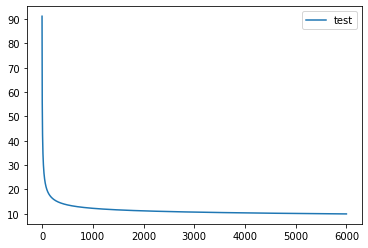

In [ ]:
plt.plot(costListTest, label='test')
plt.legend()

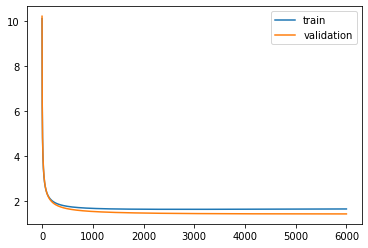

In [ ]:
plt.plot(costListTrain, label='train')
plt.plot(costListValidation, label='validation')
plt.legend()